In [55]:
from clustimage import Clustimage
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import random
import os
import re
import numpy as np

In [18]:
images_folder= "./input/flower_images/" #PONER EL PATH DE CADA UNO
images_paths = sorted([images_folder + x for x in os.listdir(images_folder) if ".png" in x ])

# Loading labels from input/flower_images/flower_labels.csv
labels = pd.read_csv("./input/flower_images/flower_labels.csv", index_col=1)

# Loading flowers names from label_names.txt
names = pd.read_csv("label_names.txt", index_col=0)

label_names = labels.join(names).reset_index()

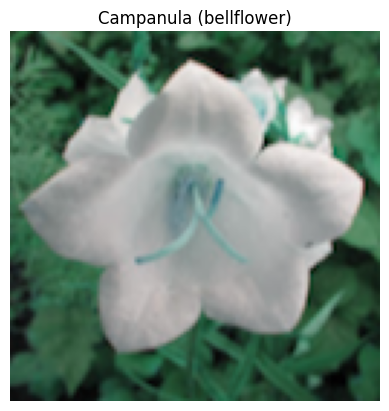

In [115]:
sample = np.random.choice(np.arange(0,len(images_paths)),1)[0]
sample_path = images_paths[sample]

img = cv2.imread(filename=sample_path)
filename = sample_path.split("/")[-1]
flower_name = label_names.loc[label_names.file==filename,'name'].values[0]
plt.imshow(img)
plt.axis('off')
plt.title(flower_name.capitalize())
plt.show()

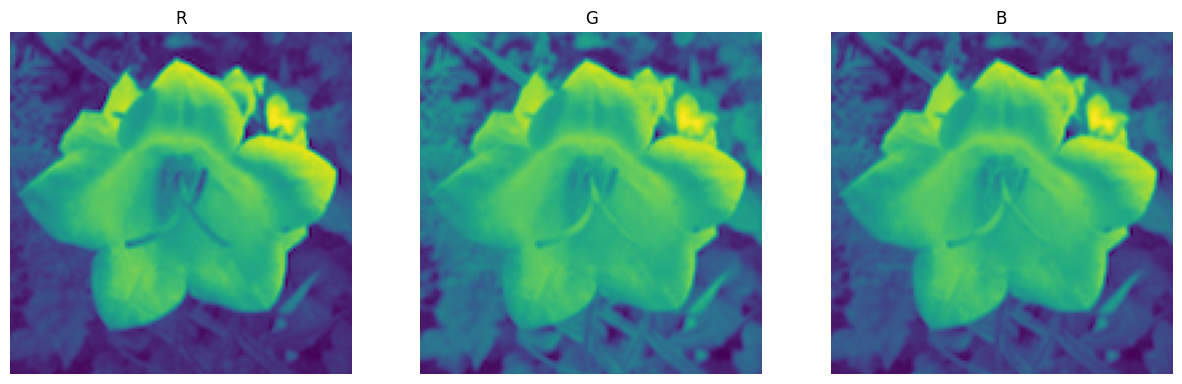

In [116]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(15,5))
for i in range(3):
    imagen = img[:,:,i]
    axs[i].imshow(imagen)
    axs[i].set_title("RGB"[i])
    axs[i].axis('off')

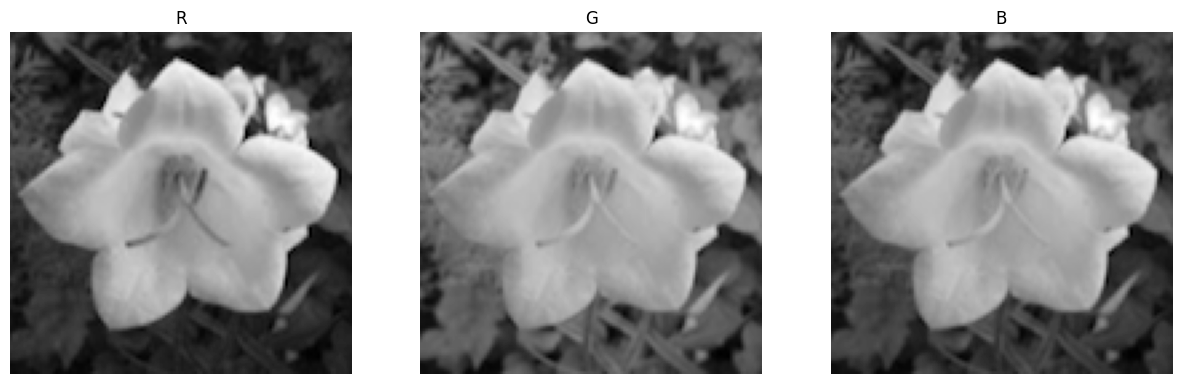

In [117]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(15,5))
for i in range(3):
    imagen = img[:,:,i]
    axs[i].imshow(imagen, cmap="gray")
    axs[i].set_title("RGB"[i])
    axs[i].axis('off')

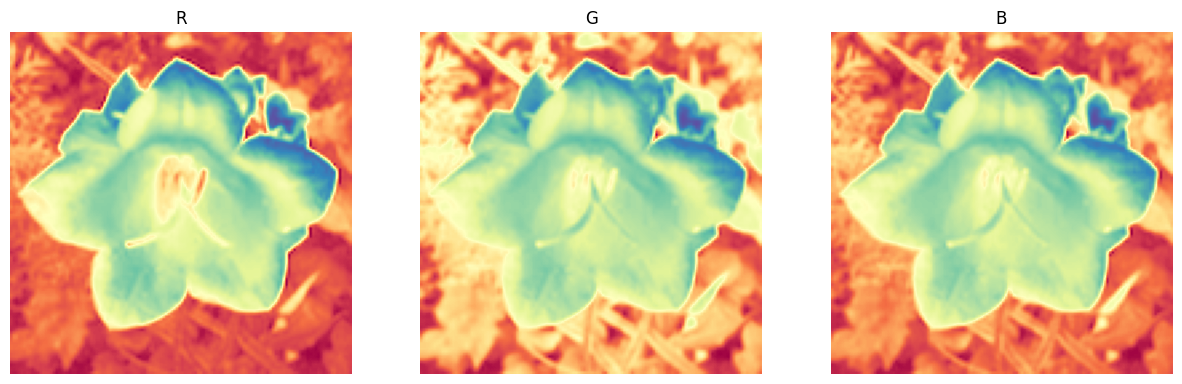

In [119]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(15,5))
for i in range(3):
    imagen = img[:,:,i]
    axs[i].imshow(imagen, cmap="Spectral")
    axs[i].set_title("RGB"[i])
    axs[i].axis('off')

La imagen se trata como un array. Puedo elegir qué parte mostrar

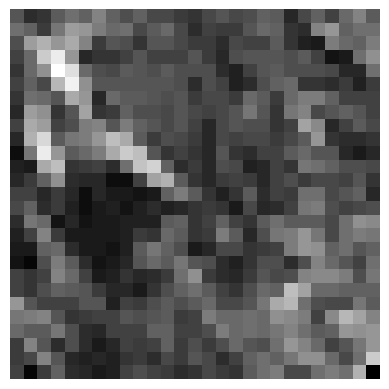

In [93]:
# Puedo seleccionar una región de la imagen
plt.imshow(imagen[3:30,3:30],cmap='gray')
plt.axis('off')
plt.show()

Text(0.5, 0, 'pixel values')

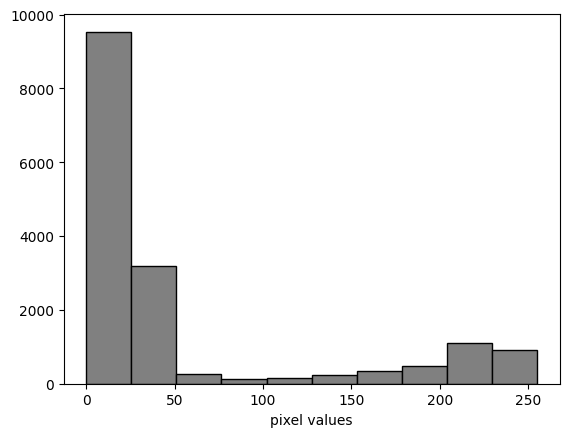

In [94]:
# Una forma de caracterizar la imagen es ver cómo es la distribución de los pixels
plt.hist(imagen.flatten(),bins=10,color='gray',edgecolor='k')
plt.xlabel('pixel values')

Como cualquier matriz, la imagen se puede rotar o girar

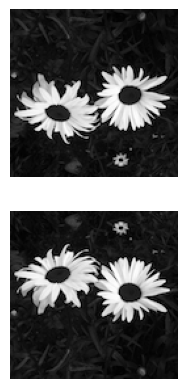

In [96]:
imagen_rotada = np.flipud(imagen) #Reverse the order of elements along axis 0 (up/down).
plt.subplot(2,1,1)
plt.imshow(imagen_rotada,cmap='gray')
plt.axis('off')
plt.subplot(2,1,2)
plt.imshow(imagen,cmap='gray')
plt.axis('off')
plt.show()

## Para suavizar una imagen o para reducir el ruido se usan filtros sobre las imágenes.

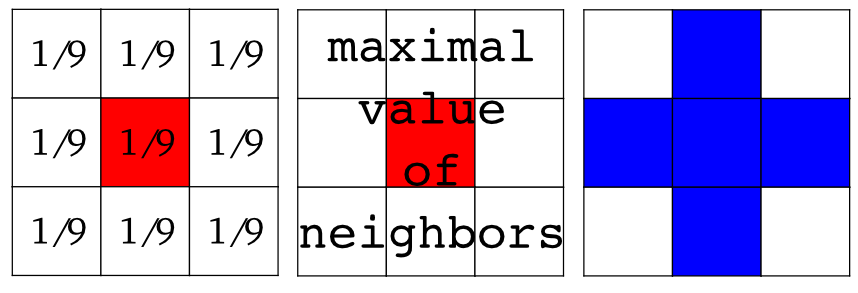


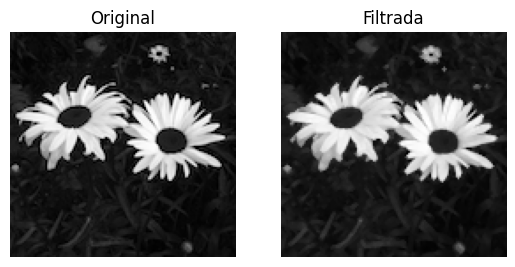

In [97]:
from scipy.ndimage import median_filter
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.median_filter.html
imagen_filtrada = median_filter(imagen,size=2)

plt.subplot(1,2,1)
plt.imshow(imagen, cmap='gray')
plt.axis('off')
plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(imagen_filtrada, cmap='gray')
plt.axis('off')
plt.title('Filtrada')
plt.show()

## Las imágenes a color
1 dimensión más  ⟶ RGB
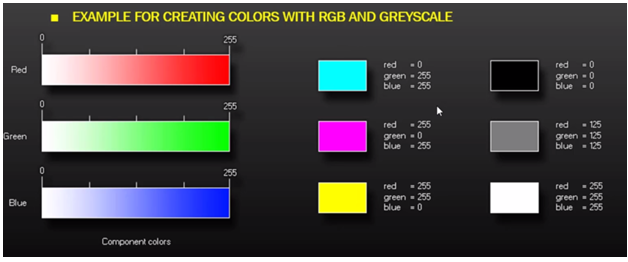

[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]


(-0.5, 127.5, 127.5, -0.5)

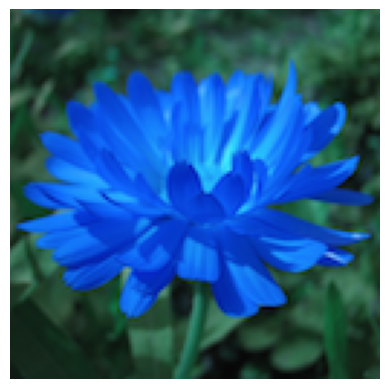

In [15]:
cl = Clustimage()
img = cl.imread(images_paths[2], dim=(128,128),colorscale=1)
len(img)
imagen_color=img.reshape(128,128,3)
plt.imshow(imagen_color)
plt.axis('off')

In [17]:
imagen_color.shape

(128, 128, 3)

In [ ]:
imagen_color2 = np.empty(3)

In [ ]:
imagen_color2 = imagen_color.copy()

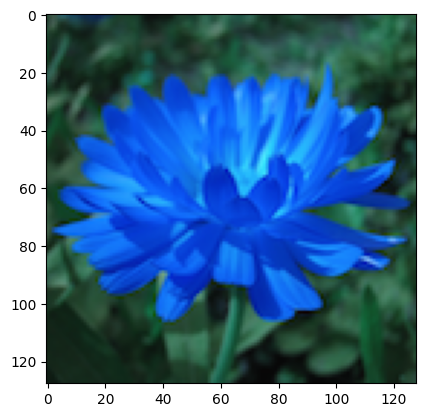

In [ ]:
plt.imshow(imagen_color2)

In [ ]:
imagen_color2[:,1,:] = imagen_color[:,0,:]

In [ ]:
imagen_color2[1] = imagen_color[2]

In [ ]:
imagen_color[3]

array([[ 40,  70,  54],
       [ 56,  81,  70],
       [ 67,  93,  81],
       [ 56,  86,  69],
       [ 33,  63,  47],
       [ 29,  53,  40],
       [ 31,  53,  42],
       [ 31,  58,  50],
       [ 29,  63,  59],
       [ 29,  67,  65],
       [ 30,  68,  67],
       [ 29,  63,  65],
       [ 26,  55,  59],
       [ 24,  49,  55],
       [ 22,  46,  56],
       [ 21,  45,  57],
       [ 20,  45,  56],
       [ 24,  52,  61],
       [ 32,  65,  69],
       [ 37,  75,  71],
       [ 38,  79,  66],
       [ 35,  77,  59],
       [ 30,  70,  51],
       [ 28,  64,  46],
       [ 29,  62,  47],
       [ 32,  65,  52],
       [ 33,  67,  53],
       [ 30,  66,  51],
       [ 28,  67,  48],
       [ 28,  70,  47],
       [ 30,  71,  49],
       [ 27,  65,  47],
       [ 22,  53,  38],
       [ 20,  42,  31],
       [ 19,  35,  29],
       [ 16,  29,  24],
       [ 17,  29,  23],
       [ 20,  34,  27],
       [ 22,  38,  30],
       [ 22,  41,  32],
       [ 21,  42,  33],
       [ 21,  45

In [ ]:
imagen_color.shape

(128, 128, 3)

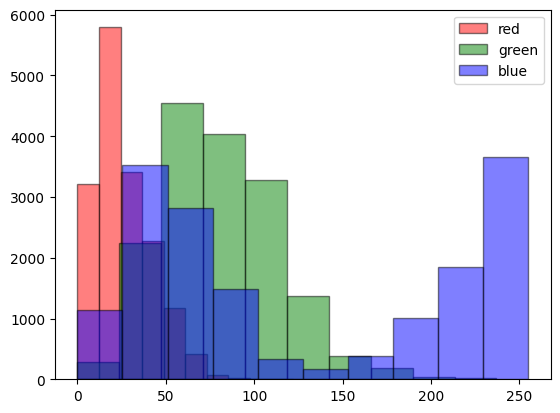

In [ ]:
colores =['red','green','blue']
for n,cs in enumerate(colores):
  monocol=imagen_color[:,:,n]
  plt.hist(monocol.flatten(),color=cs,bins=10,edgecolor='k',alpha=0.5,label=cs)
  plt.legend()

In [ ]:
labels = pd.read_csv('/content/drive/MyDrive/00_Docencia/0001_DMCT/2023_DMCT/Clases/kaggle_flower_images/flower_labels.csv')

In [ ]:
df = pd.DataFrame()
for a in path:
  img = cl.imread(a, dim=(128,128),colorscale=1)
  df = pd.concat([df, pd.DataFrame(img).T], ignore_index=True)
  # tmp = pd.concat([pd.DataFrame([a]), pd.DataFrame(img).T], axis=1)
  # df = pd.concat([df, tmp], ignore_index=True)


In [ ]:
df

,0,0,1,2,3,4,5,6,7,8,...,49142,49143,49144,49145,49146,49147,49148,49149,49150,49151
0,/content/drive/MyDrive/00_Docencia/0001_DMCT/2...,10,22,13,9,23,14,10,24,16,...,70,38,38,59,16,25,26,78,74,117
1,/content/drive/MyDrive/00_Docencia/0001_DMCT/2...,30,49,38,30,50,37,30,52,38,...,10,8,10,9,7,7,7,5,5,5
2,/content/drive/MyDrive/00_Docencia/0001_DMCT/2...,48,83,65,58,87,72,62,90,74,...,50,38,70,52,41,74,56,42,76,58
3,/content/drive/MyDrive/00_Docencia/0001_DMCT/2...,105,54,167,94,68,152,100,82,161,...,111,69,45,108,70,44,106,70,44,106
4,/content/drive/MyDrive/00_Docencia/0001_DMCT/2...,78,52,193,76,51,194,85,58,195,...,252,200,179,253,189,163,248,154,120,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,/content/drive/MyDrive/00_Docencia/0001_DMCT/2...,41,171,95,31,164,84,39,157,81,...,32,20,94,31,19,88,31,13,60,23
206,/content/drive/MyDrive/00_Docencia/0001_DMCT/2...,12,14,13,11,14,12,11,14,12,...,10,13,13,13,13,15,15,14,14,14
207,/content/drive/MyDrive/00_Docencia/0001_DMCT/2...,5,5,5,5,5,5,4,5,4,...,2,2,2,2,4,4,4,9,9,9
208,/content/drive/MyDrive/00_Docencia/0001_DMCT/2...,51,82,69,52,83,71,44,77,66,...,151,103,190,142,90,180,132,80,166,116


In [ ]:
img = cl.imread(a, dim=(128,128),colorscale=1)
img.shape

(49152,)

In [ ]:
pd.DataFrame(path)

,0
0,/content/drive/MyDrive/00_Docencia/0001_DMCT/2...
1,/content/drive/MyDrive/00_Docencia/0001_DMCT/2...
2,/content/drive/MyDrive/00_Docencia/0001_DMCT/2...
3,/content/drive/MyDrive/00_Docencia/0001_DMCT/2...
4,/content/drive/MyDrive/00_Docencia/0001_DMCT/2...
...,...
205,/content/drive/MyDrive/00_Docencia/0001_DMCT/2...
206,/content/drive/MyDrive/00_Docencia/0001_DMCT/2...
207,/content/drive/MyDrive/00_Docencia/0001_DMCT/2...
208,/content/drive/MyDrive/00_Docencia/0001_DMCT/2...
